# Anaysis of Insurance data set basis of linear regression

# 
Linear Regression is a Supervised Machine Learning Model for 
finding the relationship between independent variables and dependent variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv("insurance.csv")

In [3]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# To show head and tail rows

In [79]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [80]:
d.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# To print dimension of dataset

In [81]:
d.ndim

2

# To print column names

In [4]:
d.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# To print index

In [5]:
d.index

RangeIndex(start=0, stop=1338, step=1)

# Size of dataset

In [6]:
d.size

9366

# To show total age group is less than 50

In [7]:
print((d["age"]<=50).sum())

982


# To show information of dataset

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# To check null values of a data set

In [9]:
d.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


# To check duplicated values

In [10]:
d.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

# To check unique values

In [11]:
d.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# To show statistical information

In [12]:
d.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
d.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [14]:
d.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [15]:
d.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object

In [16]:
d.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [17]:
d.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [18]:
d.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [19]:
d.sort_values(["age"],ascending=False)

,age,sex,bmi,children,smoker,region,charges
335,64,male,34.500,0,no,southwest,13822.80300
603,64,female,39.050,3,no,southeast,16085.12750
752,64,male,37.905,0,no,northwest,14210.53595
1265,64,male,23.760,0,yes,southeast,26926.51440
534,64,male,40.480,0,no,southeast,13831.11520
...,...,...,...,...,...,...,...
942,18,female,40.185,0,no,northeast,2217.46915
46,18,female,38.665,2,no,northeast,3393.35635
295,18,male,22.990,0,no,northeast,1704.56810
50,18,female,35.625,0,no,northeast,2211.13075


# To show a correlation

In [20]:
d.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Region vs charges

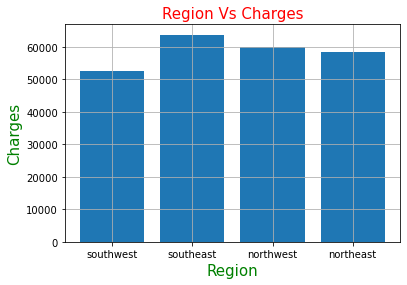

In [21]:
plt.bar(d['region'],d['charges'])
plt.title('Region Vs Charges',fontsize=15,color='red')
plt.xlabel('Region',fontsize=15,color='green')
plt.ylabel('Charges',fontsize=15,color='green')
plt.grid(True)
plt.show()

# Medical insurance basis of different region

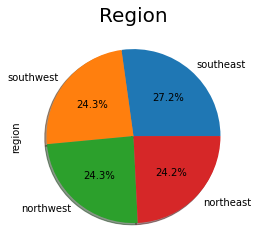

In [22]:
plt.title("Region",fontsize=20)
d['region'].value_counts().plot.pie(autopct="%1.1f%%",shadow=True)
plt.show()

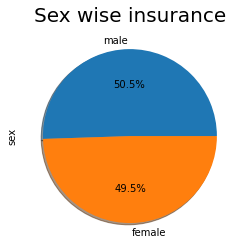

In [23]:
plt.title("Sex wise insurance",fontsize=20)
d['sex'].value_counts().plot.pie(autopct="%1.1f%%",shadow=True)
plt.show()

# To plot a regression plot from all data set

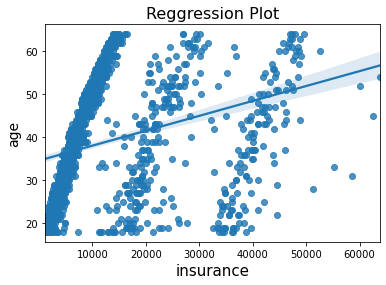

In [24]:
sns.regplot(y=d['age'],x=d["charges"])
plt.title("Reggression Plot",size=16)
plt.ylabel("age",size=14)
plt.xlabel("insurance",size=15)
plt.show()


# Sample data selection

In [26]:
d_samp=d.sample(10)

In [27]:
d_samp

,age,sex,bmi,children,smoker,region,charges
454,32,male,46.530,2,no,southeast,4686.38870
196,39,female,32.800,0,no,southwest,5649.71500
792,22,female,23.180,0,no,northeast,2731.91220
812,54,male,21.010,2,no,southeast,11013.71190
1008,25,male,24.985,2,no,northeast,23241.47453
494,21,male,25.700,4,yes,southwest,17942.10600
816,24,female,24.225,0,no,northwest,2842.76075
512,51,male,22.420,0,no,northeast,9361.32680
505,37,male,30.875,3,no,northwest,6796.86325
116,58,male,49.060,0,no,southeast,11381.32540


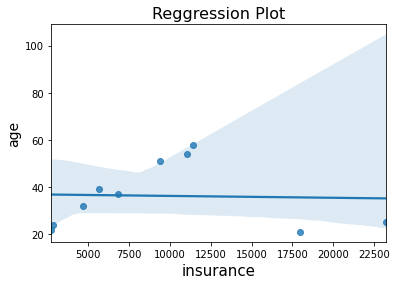

In [28]:
sns.regplot(y=d_samp['age'],x=d_samp["charges"])
plt.title("Reggression Plot",size=16)
plt.ylabel("age",size=14)
plt.xlabel("insurance",size=15)
plt.show()


In [29]:
d_sort = d.sort_values(by="age",ascending = False).head(50)

In [30]:
d_sort

,age,sex,bmi,children,smoker,region,charges
335,64,male,34.500,0,no,southwest,13822.80300
603,64,female,39.050,3,no,southeast,16085.12750
752,64,male,37.905,0,no,northwest,14210.53595
1265,64,male,23.760,0,yes,southeast,26926.51440
534,64,male,40.480,0,no,southeast,13831.11520
328,64,female,33.800,1,yes,southwest,47928.03000
768,64,female,39.700,0,no,southwest,14319.03100
1241,64,male,36.960,2,yes,southeast,49577.66240
62,64,male,24.700,1,no,northwest,30166.61817
801,64,female,35.970,0,no,southeast,14313.84630


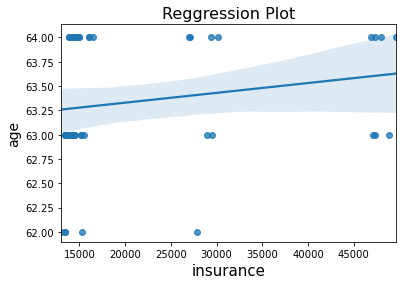

In [31]:
sns.regplot(y=d_sort['age'],x=d_sort["charges"])
plt.title("Reggression Plot",size=16)
plt.ylabel("age",size=14)
plt.xlabel("insurance",size=15)
plt.show()


# X independent Variable

In [32]:
x = d_samp[['age','bmi']]

In [33]:
x

,age,bmi
454,32,46.530
196,39,32.800
792,22,23.180
812,54,21.010
1008,25,24.985
494,21,25.700
816,24,24.225
512,51,22.420
505,37,30.875
116,58,49.060


# Y dependent variable

In [34]:
y = d_samp[['charges']]

In [35]:
y

,charges
454,4686.38870
196,5649.71500
792,2731.91220
812,11013.71190
1008,23241.47453
494,17942.10600
816,2842.76075
512,9361.32680
505,6796.86325
116,11381.32540


In [36]:
print(x[:5])

      age     bmi
454    32  46.530
196    39  32.800
792    22  23.180
812    54  21.010
1008   25  24.985


In [37]:
print(y[:5])

          charges
454    4686.38870
196    5649.71500
792    2731.91220
812   11013.71190
1008  23241.47453


In [38]:
print(y.shape)

(10, 1)


# Creating a training and testing data set

In [39]:
from sklearn.model_selection import train_test_split

# Perform the split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 2)
(3, 2)
(7, 1)
(3, 1)


# Specify the split size manually by specifying the parameter of test size

# 
Now I split dataset into a training set and testing set. 
The training set will used for training the model and testing set for testing the model.
Creating a split of 40% testing data and 60% of the training set.

# 
*random_state means (42) is just a random number 
*It helps to reproduce the same result after reuse the train_test_split. 
*If you do not use a random_state in train_test_split, 
every time you make the split you might get a different set of train
and test data points and will not help you in debugging in case you get an issue

# 
test_size is the number that defines the size of the training set. 
If you provide a float , then it must be between 0.0 and 1.0 and 
will define the share of the dataset used for testing.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=25)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6, 2)
(4, 2)
(6, 1)
(4, 1)


# Importing the linear regression model

In [44]:
from sklearn.linear_model import LinearRegression

# Creating a variable called l and storing object in it.

In [45]:
model=LinearRegression()

# Training our regression model

# Fit function 
adjusts weights according to data values so that better accuracy can be achieved.
After training, the model can be used for predictions.

In [46]:
model.fit(x_train,y_train)

LinearRegression()

In [47]:
print("train test complete")

train test complete


# Checking the accuracy score of our model

In [48]:
model.score(x_train,y_train)

0.03378682173598713

# 
Our accuracy is 98%, which means that its performace is quite effective

# Checking the coefficients

In [49]:
model.coef_

array([[103.29649323, -90.10568322]])

In [50]:
x_train.columns

Index(['age', 'bmi'], dtype='object')

In [51]:
cdf = pd.DataFrame(data=model.coef_.reshape(2,1),index=x_train.columns,columns=['Coeff'])

In [52]:
cdf

,Coeff
age,103.296493
bmi,-90.105683


In [53]:
y_pred=model.predict(x_test)

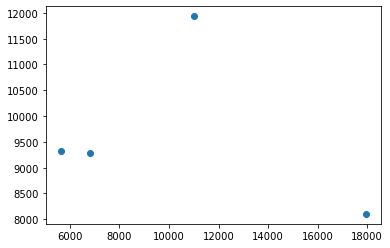

In [54]:
plt.scatter(y_test,y_pred)

<AxesSubplot:ylabel='Density'>

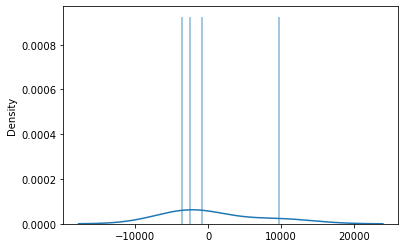

In [55]:
sns.distplot((y_test-y_pred),bins=50)